In [24]:
from scipy import signal
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
"""
In this notebook, I want to calculate the one dimensional auto correlation of a function. Depending on your case study, it will give you some 
intuition about your data set"""
# importing data set: 
data = pd.read_csv('/content/drive/MyDrive/Sunspots.csv')
print (display(data))

,Num,Date,Monthly
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7
...,...,...,...
3260,3260,2020-09-30,0.6
3261,3261,2020-10-31,14.4
3262,3262,2020-11-30,34.0
3263,3263,2020-12-31,21.8


None


This data indicates the meaurements of sunspot numbers. This data is available here: https://www.kaggle.com/robervalt/sunspots

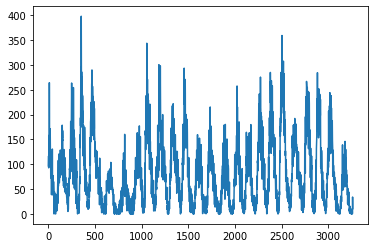

In [14]:
# we just need the month column (this data is a time series):
dataa = data.Monthly.values
plt.plot(dataa)
# Notice that we only picked month values, so the x axis shows the number of sun spots every month.

In [16]:
# there is not any obvious pattern in this plot! In this stage, auto corr will help us:
# this is out main function to calculate auto corr (I choose a window with variable length which act on all data):
def Auto_corr(x , tau = 800): # tau specifies the length of window
  if tau > len(x)-1:
    print ('The maximum number of tau can be {}'.format(len(x)-1))
  else:  
    CC = np.zeros(tau)
    CC[0] = 1 # every array of numbers is correlated with itself!
    for i in range(1,tau):
      x11 = x[i::]
      x22 = x[0:-i]
      CC[i],_ = stats.pearsonr(x11,x22)
    return CC

In [29]:
corr_dataa = Auto_corr(dataa, tau = 700)

Text(0, 0.5, 'amount of correlation')

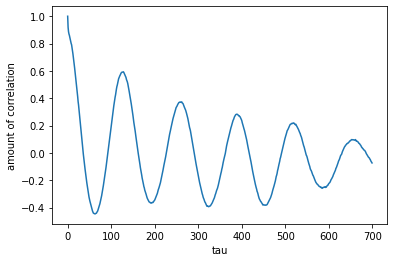

In [21]:
plt.plot(corr_dataa)
plt.xlabel('tau')
plt.ylabel('amount of correlation')

[128 262 388 518 653 661]


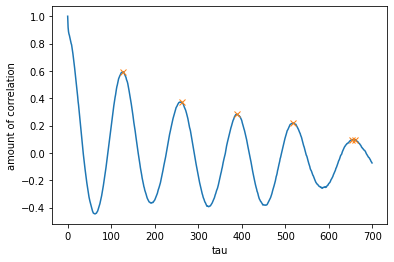

In [40]:
# As you can see, there are some peaks that tell us about the correlation. We can locate the exact amount of tau using scipy:
peak , _ = signal.find_peaks(corr_dataa , height = 0 , width = 5)
print ('high correlation tau: ', peak)
plt.plot(corr_dataa)
plt.plot(peak, corr_dataa[peak], 'x')
plt.xlabel('tau')
plt.ylabel('amount of correlation')
plt.show()
# Notice that tau can be interpreted as month too. Since tau = 2 means 2 months later the first measurement

This line graph tells us that there is a correlation between data every 128 months. Interestingly, according to the Kaggle site, the number of sun spots vary roughly every 11 years which is in accordance with our findings. 